<a href="https://colab.research.google.com/github/ws17863276480/Deep-Learning-Emotion-Decoding-using-EEG-data-from-Autism-individuals/blob/master/eeg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 61.9 MB/s eta 0:00:00


Extracting EDF parameters from /content/eeg/1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Using matplotlib as 2D backend.


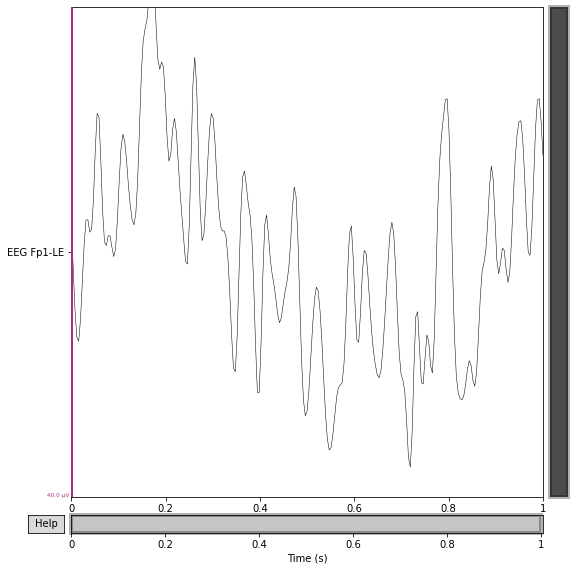

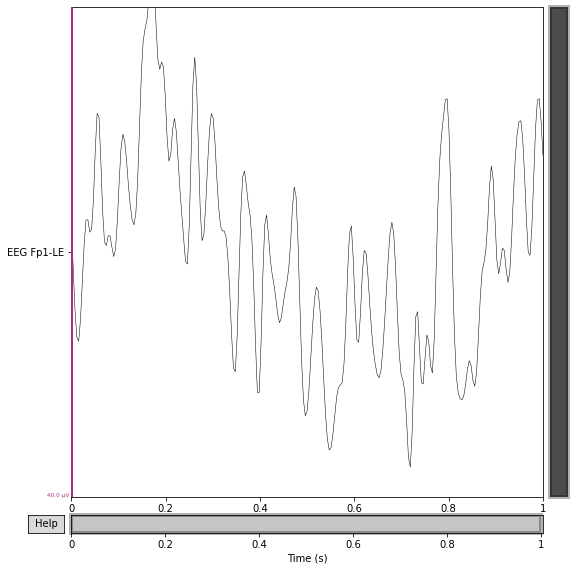

In [4]:
import mne

# 读取EDF文件
raw = mne.io.read_raw_edf('/content/eeg/1.edf', preload=True)

# 提取通道
channel_name = 'EEG Fp1-LE'
raw_ch = raw.copy().pick_channels([channel_name])

# 取中间1秒的时间片段
start_time = raw_ch.times[-1] / 2 - 0.5  # 取数据中间的1秒
duration = 1  # 持续时间
raw_ch_1s = raw_ch.copy().crop(tmin=start_time, tmax=start_time + duration)

# 绘制信号图像
raw_ch_1s.plot()



Extracting EDF parameters from /content/eeg/1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


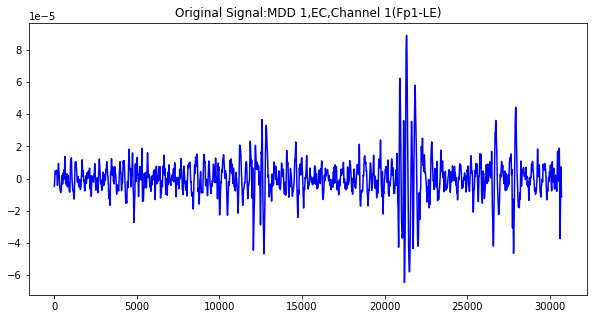

Extracting EDF parameters from /content/eeg/1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


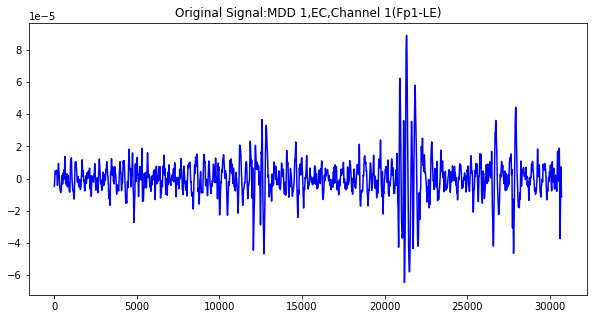

In [24]:
import mne
import numpy as np

# 设置文件名和路径
file_path = '/content/eeg/1.edf'

# 读取EDF文件数据
raw = mne.io.read_raw_edf(file_path, preload=True)

# 选择通道

raw_ch = raw.copy().pick_channels(['EEG Fp1-LE']).filter(l_freq=0.5, h_freq=4)

# 截取时间片段
start_time = (raw.n_times // 2 - 60 * raw.info['sfreq']).astype(int)  # 开始时间
end_time = (raw.n_times // 2 + 60 * raw.info['sfreq']).astype(int)  # 结束时间
raw_ch_120s = raw_ch.copy().crop(tmin=start_time / raw.info['sfreq'], tmax=end_time / raw.info['sfreq'])

# 计算时间轴
n_samples = raw_ch_120s.n_times
sfreq = raw_ch_120s.info['sfreq']
time_axis = np.arange(n_samples)

# 绘制信号图像
plt.figure(figsize=(10, 5))
plt.plot(time_axis, raw_ch_120s.get_data()[0], color='blue')

plt.title('Original Signal:MDD 1,EC,Channel 1(Fp1-LE)', y=1)
plt.show()


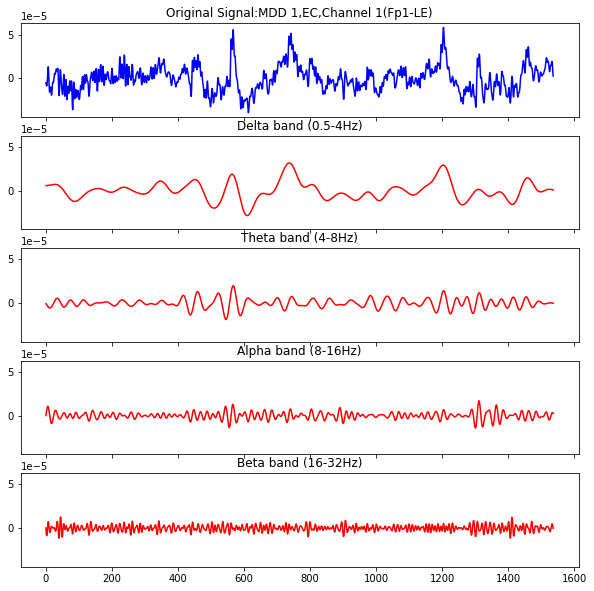

In [52]:
import mne
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# 加载原始脑电数据
raw = mne.io.read_raw_edf('/content/eeg/1.edf', preload=True, verbose=False)
raw.crop(tmax=6)

# 获取采样频率和信号长度
sfreq = raw.info['sfreq']
n_samples = raw.n_times

# 获取EEG Fp1-LE通道的数据
ch_data = raw.get_data(picks='EEG Fp1-LE')[0]

# 设计带通滤波器，分别对应delta、theta、alpha和beta频带
freq_bands = {'Delta': [0.5, 4], 'Theta': [4, 8], 'Alpha': [8, 16], 'Beta': [16, 32]}
b, a = {}, {}
for band, freqs in freq_bands.items():
    f_low, f_high = freqs
    Wn = [f_low / (sfreq / 2), f_high / (sfreq / 2)]
    b[band], a[band] = signal.butter(4, Wn, btype='band', analog=False)

# 对原始信号进行滤波，并分别绘制滤波前后的信号图像
fig, axs = plt.subplots(nrows=len(freq_bands) + 1, sharex=True, sharey=True, figsize=(10, 10))
axs[0].plot(ch_data, color='blue')
axs[0].set(title='Original Signal:MDD 1,EC,Channel 1(Fp1-LE)')
for i, (band, freqs) in enumerate(freq_bands.items()):
    f_low, f_high = freqs
    ch_data_filt = signal.filtfilt(b[band], a[band], ch_data)
    axs[i+1].plot(ch_data_filt, color='red')
    axs[i+1].set(title=f'{band} band ({f_low}-{f_high}Hz)')

plt.show()